In [1]:
from data_preprocessing import load_and_preprocess
from dataset_creator import split_dataset, create_dataset
from model_1dcnn import build_model
from utils import inverse_transform_and_evaluate
import predict  

LOOK_BACK = 5
INPUT_DIM = 9
TARGET_INDEX = 1

# data preprocessing
dataset_scaled, scalar_dim_scaled, scaler_dim, scaler_all = load_and_preprocess('SolarPrediction_aligned_Sun.csv', nrows=576*15)

# divide data into time seqences
train, test = split_dataset(dataset_scaled)
trainX, trainY = create_dataset(train, look_back=LOOK_BACK, input_dim=INPUT_DIM, target_index=TARGET_INDEX)
testX, testY = create_dataset(test, look_back=LOOK_BACK, input_dim=INPUT_DIM, target_index=TARGET_INDEX)

# build and train the model
model = build_model(input_shape=(LOOK_BACK, INPUT_DIM))
model.fit(trainX, trainY, epochs=100, batch_size=21, validation_data=(testX, testY))

# prediction and evaluation
trainPred = model.predict(trainX)
testPred = model.predict(testX)

trainY_inv, trainPred_inv, _, _ = inverse_transform_and_evaluate(scaler_dim, trainY, trainPred)
testY_inv, testPred_inv, rmse, mae = inverse_transform_and_evaluate(scaler_dim, testY, testPred)

Epoch 1/100


C:\Users\wang8\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\wang8\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\wang8\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\wang8\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

276/276 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 2/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 3/100
276/276 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 4/100
276/276 [==============================] - 1s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/100
276/276 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 7/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 8/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 9/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/100
276/276 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0043
E

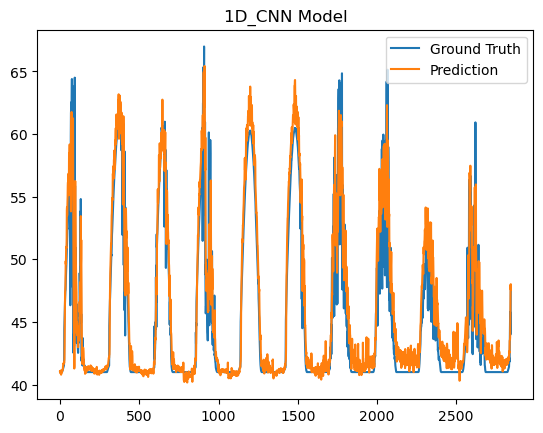

MAE: 1.48
RMSE: 2.36
R2 Score: 0.86
MAE: 1.48
RMSE: 2.36
R2 Score: 0.86
MAE: 1.48
RMSE: 2.36
R2 Score: 0.86


<Figure size 640x480 with 0 Axes>

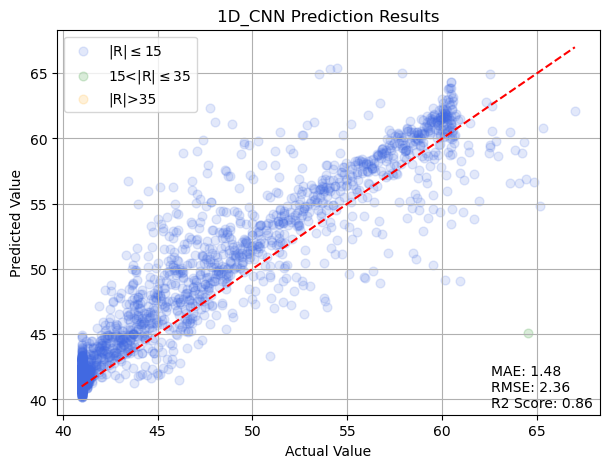

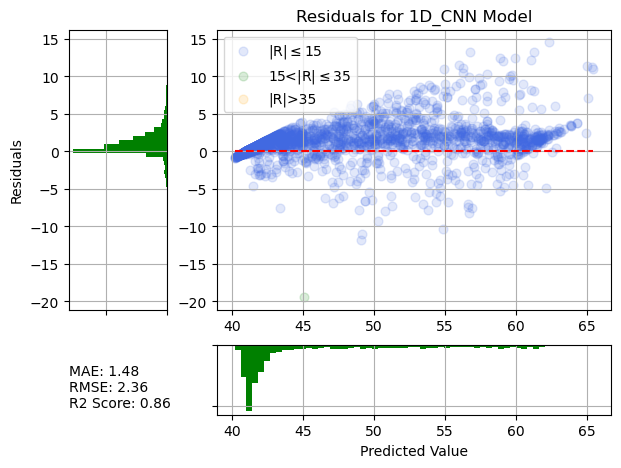

In [2]:
predict.my_self(testY_inv, testPred_inv, '1D_CNN')
predict.score_calculation(testY_inv, testPred_inv)
predict.plot_pred(testY_inv, testPred_inv, '1D_CNN')
predict.plot_residuals(testY_inv, testPred_inv, '1D_CNN')